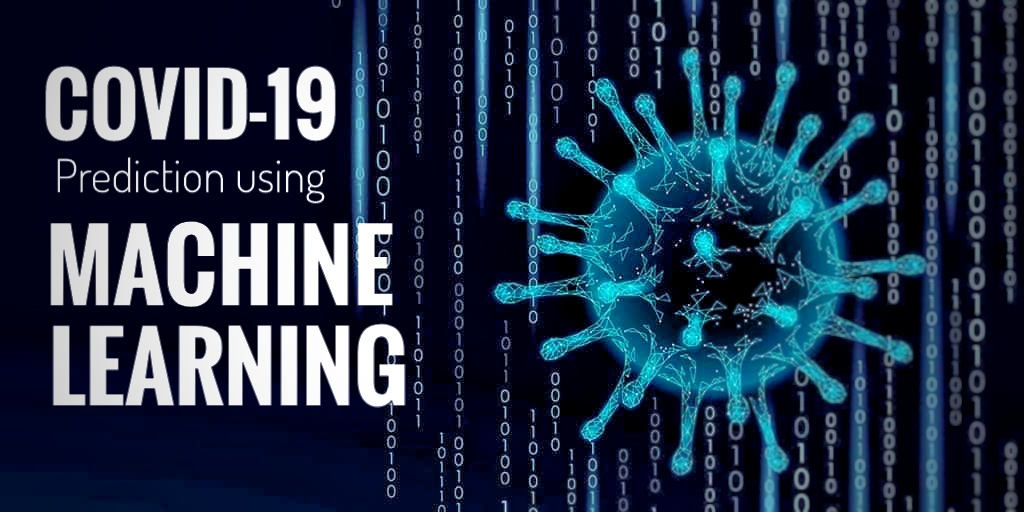

###**Machine learning-based prediction of COVID-19 diagnosis based on symptoms**


A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from a government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative.


###**Predicting diseases accurately using machine learning can significantly improve medical treatment in several ways:**

1. **Early Detection:**
   - Machine learning identifies subtle patterns in data, enabling the early detection of diseases before symptoms manifest. This facilitates timely intervention and improves treatment outcomes.

2. **Personalized Treatment:**
   - ML analyzes individual patient data to tailor treatment plans, considering genetic, lifestyle, and medical factors. Personalized medicine enhances treatment effectiveness and minimizes adverse effects.

3. **Resource Efficiency:**
   - Predictive models assist in optimizing resource allocation within healthcare institutions, ensuring efficient staffing, equipment utilization, and overall operational effectiveness.

4. **Cost Reduction:**
   - Accurate disease prediction reduces healthcare costs by preventing complications, minimizing unnecessary procedures, and streamlining resource usage, leading to more cost-effective healthcare delivery.

5. **Improved Decision Support:**
   - ML algorithms provide healthcare professionals with evidence-based decision support, analyzing patient data and medical literature to enhance the accuracy and consistency of clinical decisions.

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [294]:
plt.style.use('seaborn-v0_8')   # Applying the chart type

In [295]:
# Set the default figsize for all plots
plt.rcParams['figure.figsize'] = (8, 6)  # Adjust the values (width, height) as needed

In [296]:
data = pd.read_csv('/content/corona_tested_006.csv')

<ipython-input-296-f2bb24fc576e>:1: DtypeWarning:

Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [297]:
df = data.copy() # creating copy of the original dataset

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


So this dataset have 278848 number of rows and 11 columns. And looks we don't have NaN values in the data.

In [299]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


Summary of the dataset and each column explaination

A. Basic Information

1. ID (Individual ID)
2. Sex (male/female).
3. Age ≥60 above years (true/false) whether a person is greater than or equal to 60 years old
4. Test date (date when tested for COVID) Date of the RT-PCR testing for each individual


B. Symptoms: Whether the person having these symptoms or not.

5. Cough (true/false).
6. Fever (true/false).
7. Sore throat (true/false).
8. Shortness of breath (true/false).
9. Headache (true/false).

C. Other information:

10. Known contact with an individual confirmed to have COVID-19 (Abroad/ Contact with Confirmed/ Others).

D. Covid report

11. Corona positive or negative

**By looking at the data we can conclude these points.**

1. It looks like the NaN values are replaced with 'None' here, so we need to fix this.
2. Columns have values like 'TRUE', 'FALSE', 'True' and 'False' so we need to change it into one type.
3. Datatype for 'Test_date' column needs to be change.

**Datatypes :**

1. Categorical data :

  Cough_symptoms, Fever	Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex and Known_contact
2. Numerical data :
  Ind_ID and Test_date

#**Hypothesis**

**Hypothesis 1 :**

- Since in most of the world there were lockdown imposed in the month of March so based on that I assume because of the Lockdown cases might have come down

  Ho : Cases came down in the month of April 2020

  Ha : Cases don't came down

**Hypothesis 2**

- Since it looks like a classification problem so based on it I assume that Logistic Regression model would works better for this model.

  Ho : Logistic Regression model will perform the best.

  Ha : Logistic Regression model will not perform the best.

#**Treating Missing Values**

In [300]:
# Replacing None with NaN
df = df.replace('None', np.nan, regex=True)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [302]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [303]:
df.dtypes # checking the data types if it is changed or not after changing replacing None with NaN

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

Looks like we need to change the data type of 'Test_date' column

In [304]:
# Convert the 'Test_date' column to datetime format
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y')

In [305]:
df.describe(include = 'all')

<ipython-input-305-74aa2f970831>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,4,4,4,4,4,3,2,2,3
top,NaN,2020-04-20 00:00:00,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,125703,130158,242741
first,NaN,2020-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Although the data for categorical columns have some problem of denoting true and false but the 'Corona' column has 3 unique values so let's find out what are these.

In [306]:
df['Corona'].value_counts() # count of distinct categories across the column

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [307]:
(3892/278848)*100 # % of the data which has other as count in Corona column

1.39574248336011

Ok so apart from 'positve' and 'negative' we have 'other' as well but according to the bussiness problem mentioned above we have to find out whether the person is covid 'positve' or 'negative' so we need to handle this.

I'm deleting the subsequent rows from the data which has value for 'Corona' column = 'other'. Since it dosen't makes sense to predict 'other' in the output.

In [308]:
# Drop rows where 'Corona' column is equal to 'other'
df = df[df['Corona'] != 'other']

In [309]:
df['Corona'].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

In [310]:
# Storing the 'Corona' column into a different column as 'Test_Result'
df['Test_Result'] = df['Corona']

<ipython-input-310-009935dc7d7f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [311]:
# Drop the 'Status' column permanently
df.drop('Corona', axis=1, inplace=True)

In [312]:
df.shape

(274956, 11)

So now Rows = 274956 and Columns = 11

Now changing  'TRUE', 'FALSE', 'True' and 'False' of categorical columns and seeing the value counts of each column.

In [313]:
# for Cough_symptoms column
print('value_counts before')
print(df['Cough_symptoms'].value_counts())

df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: 'FALSE' if x == False else x)
df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: 'TRUE' if x == True else x)

print("-----------------------------------")
print('value_counts after')
print(df['Cough_symptoms'].value_counts())

value_counts before
False    125685
FALSE    107448
TRUE      21741
True      19830
Name: Cough_symptoms, dtype: int64
-----------------------------------
value_counts after
FALSE    233133
TRUE      41571
Name: Cough_symptoms, dtype: int64


In [314]:
# for Fever column
print('value_counts before')
print(df['Fever'].value_counts())

df['Fever'] = df['Fever'].apply(lambda x: 'FALSE' if x == False else x)
df['Fever'] = df['Fever'].apply(lambda x: 'TRUE' if x == True else x)

print("-----------------------------------")
print('value_counts after')
print(df['Fever'].value_counts())

value_counts before
False    135729
FALSE    117600
TRUE      11589
True       9786
Name: Fever, dtype: int64
-----------------------------------
value_counts after
FALSE    253329
TRUE      21375
Name: Fever, dtype: int64


In [315]:
# for Sore_throat column
print('value_counts before')
print(df['Sore_throat'].value_counts())

df['Sore_throat'] = df['Sore_throat'].apply(lambda x: 'FALSE' if x == False else x)
df['Sore_throat'] = df['Sore_throat'].apply(lambda x: 'TRUE' if x == True else x)

print("-----------------------------------")
print('value_counts after')
print(df['Sore_throat'].value_counts())

value_counts before
False    209768
FALSE     63295
TRUE       1173
True        719
Name: Sore_throat, dtype: int64
-----------------------------------
value_counts after
FALSE    273063
TRUE       1892
Name: Sore_throat, dtype: int64


In [316]:
# for Shortness_of_breath column
print('value_counts before')
print(df['Shortness_of_breath'].value_counts())

df['Shortness_of_breath'] = df['Shortness_of_breath'].apply(lambda x: 'FALSE' if x == False else x)
df['Shortness_of_breath'] = df['Shortness_of_breath'].apply(lambda x: 'TRUE' if x == True else x)

print("-----------------------------------")
print('value_counts after')
print(df['Shortness_of_breath'].value_counts())

value_counts before
False    210022
FALSE     63384
TRUE       1084
True        465
Name: Shortness_of_breath, dtype: int64
-----------------------------------
value_counts after
FALSE    273406
TRUE       1549
Name: Shortness_of_breath, dtype: int64


In [317]:
# for Headache column
print('value_counts before')
print(df['Headache'].value_counts())

df['Headache'] = df['Headache'].apply(lambda x: 'FALSE' if x == False else x)
df['Headache'] = df['Headache'].apply(lambda x: 'TRUE' if x == True else x)

print("-----------------------------------")
print('value_counts after')
print(df['Headache'].value_counts())

value_counts before
False    209510
FALSE     63062
TRUE       1406
True        977
Name: Headache, dtype: int64
-----------------------------------
value_counts after
FALSE    272572
TRUE       2383
Name: Headache, dtype: int64


In [318]:
df['Age_60_above'].value_counts()

No     123867
Yes     25425
Name: Age_60_above, dtype: int64

In [319]:
df['Sex'].value_counts()

female    128541
male      127370
Name: Sex, dtype: int64

In [320]:
df['Known_contact'].value_counts()

Other                     239404
Abroad                     25074
Contact with confirmed     10478
Name: Known_contact, dtype: int64

In [321]:
# count plot of Known_contact
fig = px.histogram(df, x='Known_contact', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

This column tells us about if the person comes under the cotact of another person having COVID-19 or not?

- **Abroad** - might be the person who travelled from different country.
- **Contact with confirmed** - might be the persons who knew they came closly in contact with the person who tested positive these might be there family or friends.
- **Other** - These might be the people who don't know that were they in the contact with infacted person or not, or might be we don't have any information regarding that i.e. it can be anything like he/she don't want to reveal where they were in the last few days.

In [322]:
df['Test_Result'].value_counts()

negative    260227
positive     14729
Name: Test_Result, dtype: int64

In [323]:
# count plot of Test_Result
fig = px.histogram(df, x='Test_Result', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [324]:
missing_value = df.isnull()

# count of missing values
missing_value.sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Age_60_above           125664
Sex                     19045
Known_contact               0
Test_Result                 0
dtype: int64

In [325]:
# percentagr of missing values
missing_value.mean()*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.091651
Fever                   0.091651
Sore_throat             0.000364
Shortness_of_breath     0.000364
Headache                0.000364
Age_60_above           45.703313
Sex                     6.926563
Known_contact           0.000000
Test_Result             0.000000
dtype: float64

So the majorly columns named 'Age_60_above' ~45.7% and 'Sex' has ~6.9% data missing. Let's see how they are like is their any pattern or not?

In [326]:
import missingno as msno

The missingno library in Python is a tool for visualizing and understanding missing data (NaN values) in a dataset. It provides several visualizations to help you quickly grasp the patterns and distribution of missing values in your data.

<Axes: >

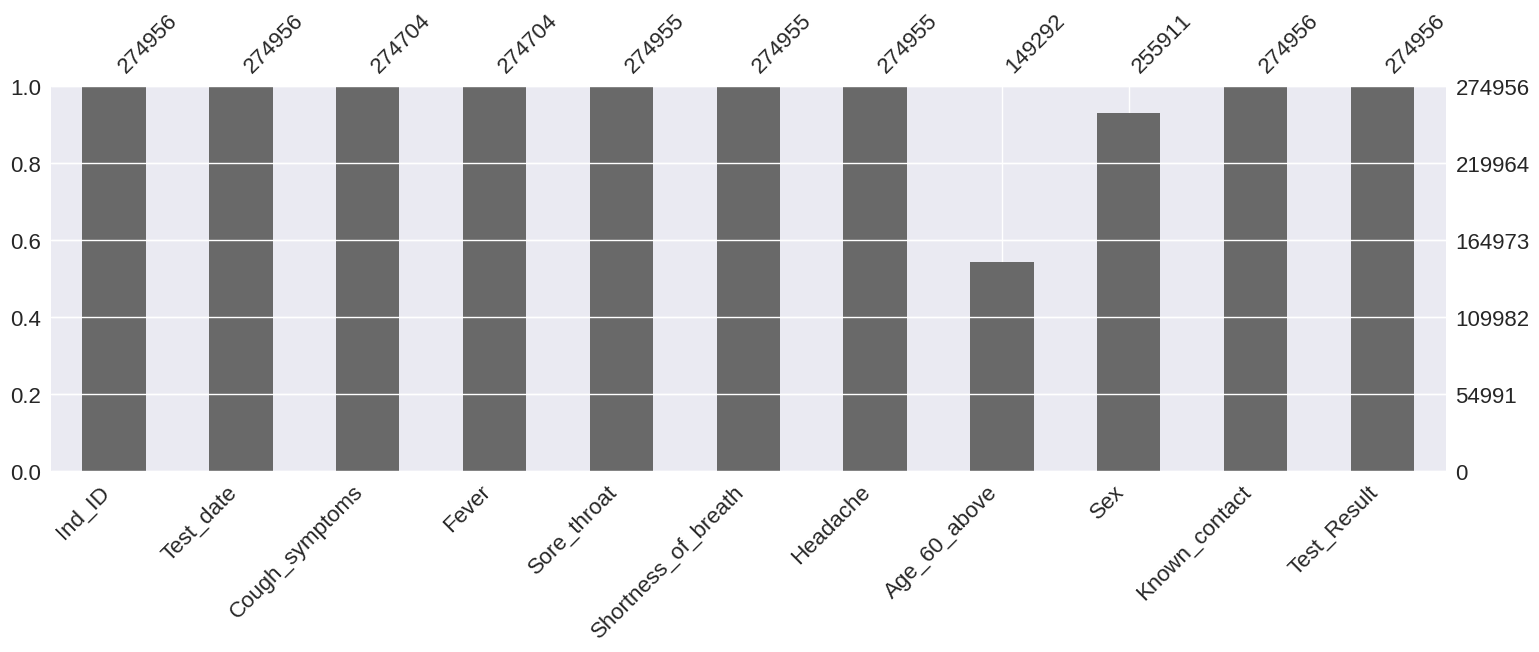

In [327]:
# Creating bar plot of missing data
msno.bar(df, figsize=(18,5))

<Axes: >

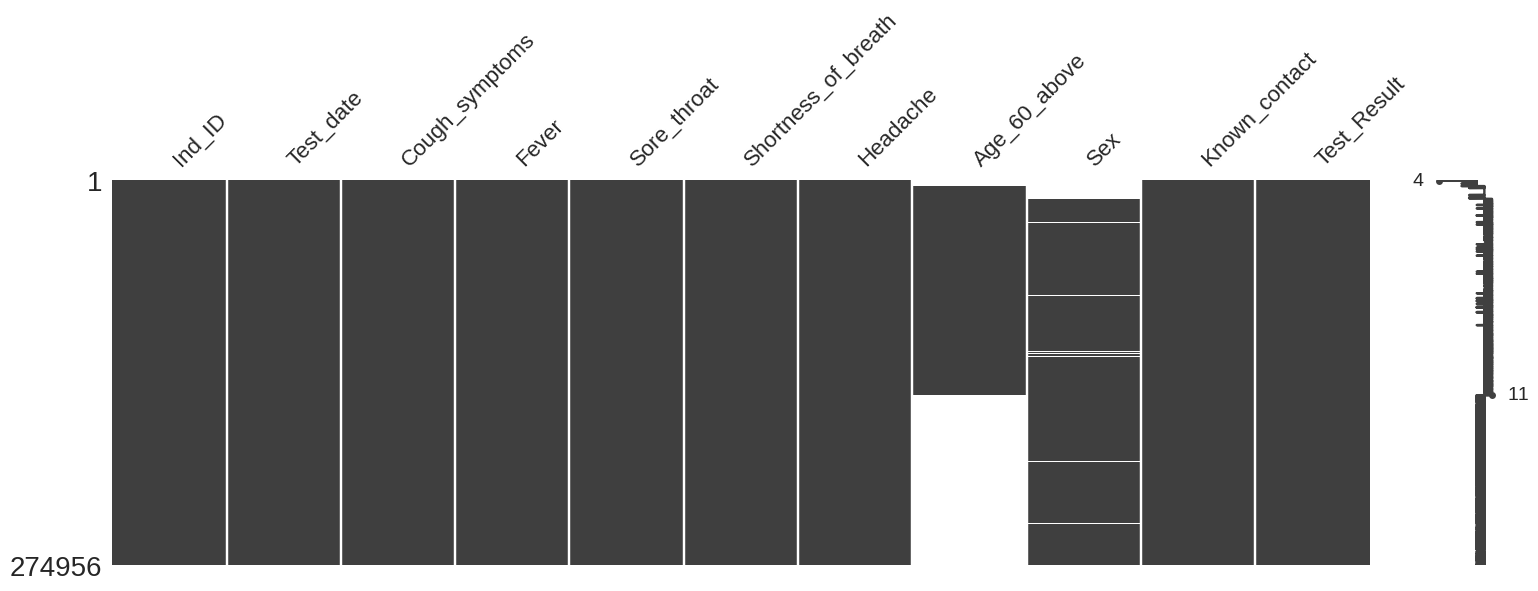

In [328]:
msno.matrix(df, figsize=(18,5))

White lines represents the missing values in the dataset.

- Looks like there is a pattern for the column 'Cough_symptoms' and 'Fever' which has missing data which might be in the top or bottom of the plot that's why we aren't able to see them.
- 'Age_60_above' column has the highest number of missing data in the starting and in the ending
- 'Sex' column has mostly starting values missing then randmoly missing values i.e. no pattern as such or missing completely at random (MCAR)

<Axes: >

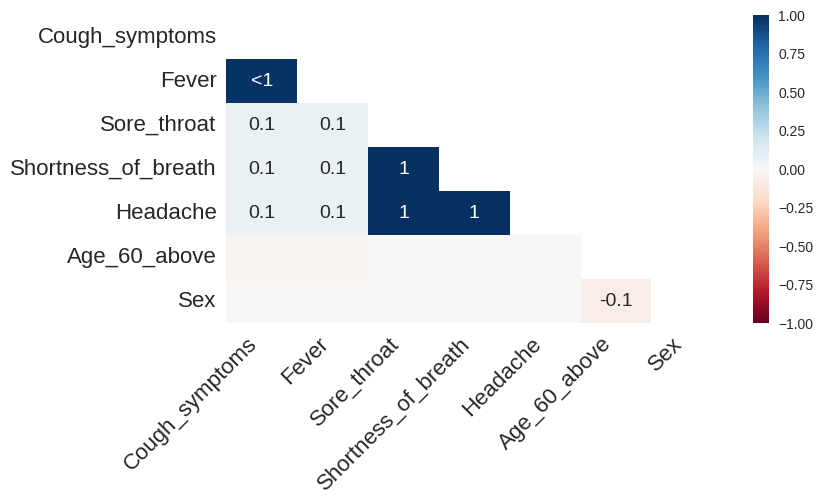

In [329]:
msno.heatmap(df, figsize=(8,4))

The heatmap here visualizes the correlation between missing values in different columns of a Pandas DataFrame. The heatmap displays how often missing values in one column coincide with missing values in another column. We have the following strong pattern relationship between the missing values of columns
- ('Fever' and 'Cough_symptoms') & ('Shortness_of_breath', 'Sore_throat' and 'Headache')
- Since 'Age_60_above' column's missing values does not have any correlation with other columns and it has ~45% of missing data so there is no point of imputing values in this column hence I'm droping this column from the data df.

In [330]:
# Droping the 'Age_60_above' column
df1 = df.drop('Age_60_above', axis=1)

In [331]:
df1.shape

(274956, 10)

Now we have Rows = 274956 and Columns = 10

###**Creating Dummy Variable**

In [332]:
df_dummy = df1.copy()

In [333]:
# For 'Cough_symptoms' converting TRUE = 1 & FALSE = 0
df_dummy['Cough_symptoms'] = df_dummy.Cough_symptoms.map({'TRUE':1,'FALSE':0})

# For 'Fever' converting TRUE = 1 & FALSE = 0
df_dummy['Fever'] = df_dummy.Fever.map({'TRUE':1,'FALSE':0})

# For 'Sore_throat' converting TRUE = 1 & FALSE = 0
df_dummy['Sore_throat'] = df_dummy.Sore_throat.map({'TRUE':1,'FALSE':0})

# For 'Shortness_of_breath' converting TRUE = 1 & FALSE = 0
df_dummy['Shortness_of_breath'] = df_dummy.Shortness_of_breath.map({'TRUE':1,'FALSE':0})

# For 'Headache' converting TRUE = 1 & FALSE = 0
df_dummy['Headache'] = df_dummy.Headache.map({'TRUE':1,'FALSE':0})

# For 'Sex' converting male = 1 & female = 0
df_dummy['Sex'] = df_dummy.Sex.map({'male':1,'female':0})

# For 'Known_contact' converting Other = 0, Abroad = 1 & Contact with confirmed = 2
df_dummy['Known_contact'] = df_dummy.Known_contact.map({'Other':0,'Abroad':1,'Contact with confirmed':2})

# For 'Test_Result' converting positive = 1 & negative = 0
df_dummy['Test_Result'] = df_dummy.Test_Result.map({'positive':1,'negative':0})

In [334]:
df_dummy.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Test_Result
0,1,2020-03-11,1.0,0.0,1.0,0.0,0.0,NaN,1,0
1,2,2020-03-11,0.0,1.0,0.0,0.0,0.0,NaN,1,1
2,3,2020-03-11,0.0,1.0,0.0,0.0,0.0,NaN,1,1
3,4,2020-03-11,1.0,0.0,0.0,0.0,0.0,NaN,1,0
4,5,2020-03-11,1.0,0.0,0.0,0.0,0.0,NaN,2,0


- Now our data is ready for the imputation

###**Imputation & deletion**

Here in the data we have some colums with a very less amount of NaN values. Since it a covid-19 prediction dataset which tells us whether a person is covid positive or not so I think its better to use dropna here. Since filling it with mode might lead to biasness hence I had decided to drop the NaN rows using dropna. Although we would lose ~6-7% of data but we can totally consider this cleaned data for ML model.

In [335]:
# Change the data type of 'Known_contact' to float
df_dummy['Known_contact'] = df_dummy['Known_contact'].astype(float)

# Change the data type of 'Test_Result' to float
df_dummy['Test_Result'] = df_dummy['Test_Result'].astype(float)

In [336]:
# count of missing values
df_dummy.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Sex                    19045
Known_contact              0
Test_Result                0
dtype: int64

In [337]:
df_dummy.dropna()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Test_Result
13727,13728,2020-03-22,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13728,13729,2020-03-22,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13730,13731,2020-03-22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13734,13735,2020-03-22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13735,13736,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
278844,278845,2020-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278845,278846,2020-04-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278846,278847,2020-04-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now this cleaned data has 255668 rows × 10 columns with zero missing values. Now we should look for Univariate, Bivariate and multivariate analysis. Hence applying it on the main data copy i.e. df

In [338]:
df1.dropna(inplace=True)

##**Univariate Analysis**

Using plotly library for analysis since they are more informative that's why.

In [339]:
# count plot of Cough_symptoms
fig = px.histogram(df1, x='Cough_symptoms', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Cough Symptoms:

  The majority of the records (216616) indicate that 'Cough_symptoms' is labeled as 'FALSE,' meaning no cough symptoms are reported.
  
  A smaller number of records (39052) indicate that 'Cough_symptoms' is labeled as 'TRUE,' suggesting the presence of cough symptoms.

2. Imbalanced classes:

  The dataset appears to be imbalanced regarding the 'Cough_symptoms' feature, with a significantly higher number of instances where cough symptoms are not reported (FALSE) compared to instances where cough symptoms are reported (TRUE).

In [340]:
# count plot of Fever
fig = px.histogram(df1, x='Fever', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Fever:

  The majority of the records (235814) indicate that 'Fever' is labeled as 'FALSE,' meaning no Fever is reported.
  
  A smaller number of records (19854) indicate that 'Fever' is labeled as 'TRUE,' suggesting the presence of Fever.

2. Imbalanced classes:

  The dataset appears to be imbalanced regarding the 'Fever' feature, with a significantly higher number of instances where Fever is not reported (FALSE) compared to instances where Fever is reported (TRUE).

In [341]:
# count plot of Sore_throat
fig = px.histogram(df1, x='Sore_throat', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Sore_throat:

  The majority of the records (254172) indicate that 'Sore_throat' is labeled as 'FALSE,' meaning no Sore_throat is reported.
  
  A smaller number of records (1496) indicate that 'Sore_throat' is labeled as 'TRUE,' suggesting the presence of Sore_throat.

2. Imbalanced classes:

  The dataset appears to be imbalanced regarding the 'Sore_throat' feature, with a significantly higher number of instances where Sore_throat is not reported (FALSE) compared to instances where Sore_throat is reported (TRUE).



In [342]:
# count plot of Shortness_of_breath
fig = px.histogram(df1, x='Shortness_of_breath', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Shortness_of_breath:

  The majority of the records (254590) indicate that 'Shortness_of_breath' is labeled as 'FALSE,' meaning no Shortness_of_breath is reported.
  
  A smaller number of records (1078) indicate that 'Shortness_of_breath' is labeled as 'TRUE,' suggesting the presence of Shortness_of_breath.

2. Imbalanced classes:

  The dataset appears to be imbalanced regarding the 'Shortness_of_breath' feature, with a significantly higher number of instances where Shortness_of_breath is not reported (FALSE) compared to instances where Shortness_of_breath is reported (TRUE).

In [343]:
# count plot of Headache
fig = px.histogram(df1, x='Headache', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Headache:

  The majority of the records (253565) indicate that 'Headache' is labeled as 'FALSE,' meaning no Headache is reported.
  
  A smaller number of records (2103) indicate that 'Headache' is labeled as 'TRUE,' suggesting the presence of Headache.

2. Imbalanced classes:

  The dataset appears to be imbalanced regarding the 'Headache' feature, with a significantly higher number of instances where Headache is not reported (FALSE) compared to instances where Headache is reported (TRUE).

In [344]:
# count plot of Known_contact
fig = px.histogram(df1, x='Known_contact', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Distribution of Known Contact Types:

- The majority of entries (222766) fall under the category "Other."
- There are 23309 entries labeled as "Abroad."
- "Contact with confirmed" has 9593 entries.

2. Prevalence of Different Contact Types:

- The category "Other" is the most prevalent, suggesting that it is a common or unspecified type of contact.
- "Abroad" indicates a significant number of cases with a history of international travel.
- "Contact with confirmed" suggests cases where individuals have been in contact with someone confirmed to have the condition.

3. Potential Data Quality Issues:

- The term "Other" is often used for unspecified or miscellaneous categories. Further investigation may be needed to understand the nature of these cases.
- The distinction between "Abroad" and "Contact with confirmed" provides insights into potential sources of infection.

4. Data Understanding:

  Univariate analysis of this column alone provides a snapshot of the different categories of known contacts. However, to gain a more comprehensive understanding, it is valuable to combine this information with other relevant variables in bivariate or multivariate analyses.

In [345]:
# count plot of Test_Result
fig = px.histogram(df1, x='Test_Result', title='Count Plot', height=500, width=600)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

1. Imbalance in Test Results:

  - There is a significant imbalance in the number of negative results (242136) compared to positive results (13532).
  
  - The dataset is skewed towards negative test results.

2. Prevalence of Negative Results:

  The majority of individuals in the dataset have tested negative for COVID-19, which is a common trend in many testing scenarios.

3. Sensitivity and Specificity Considerations:

  The imbalance may influence how you evaluate the performance of your model. Metrics such as sensitivity (recall) and specificity may be more informative in this context.

### **Potential Impact on Models**:

 1. Imbalanced classes can impact the performance of machine learning models, especially in tasks like binary classification. Models may be biased towards the majority class. Now let's jump into Bivariate analysis.

 2. Need for Sampling Strategies:

  Depending on the modeling objectives, we might need to consider sampling strategies (oversampling the minority class, undersampling the majority class, or using more advanced techniques) to address class imbalance during model training

##**Bivariate analysis**

1. Crosstabulation: Crosstabulation for 'Cough_symptoms' and 'Test_Result' are related.

In [346]:
pd.crosstab(df1['Cough_symptoms'], df1['Test_Result'], margins=True)

Test_Result,negative,positive,All
Cough_symptoms,,,
FALSE,209148,7468,216616
TRUE,32988,6064,39052
All,242136,13532,255668


In [347]:
# Relationship between Cough_symptoms & Test_Result
fig = px.histogram(df1, x='Cough_symptoms', color='Test_Result', height=500, width=600)

# Update the layout of the figure
fig.update_layout(
    title='Test Result Distribution based on Cough Symptoms',
    xaxis_title='Cough Symptoms',
    yaxis_title='Count',
    barmode='group'  # Specify 'group' for grouped bars
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- In the 'FALSE' row:

  1. 209148 cases have no cough symptoms ('Cough_symptoms = FALSE') and tested negative ('Test_Result = negative').
  2. 7468 cases have no cough symptoms and tested positive.

- In the 'TRUE' row:

  1. 32988 cases have cough symptoms ('Cough_symptoms = TRUE') and tested negative.
  2. 6064 cases have cough symptoms and tested positive.

In [348]:
# Relationship between Fever & Test_Result
fig = px.histogram(df1, x='Fever', color='Test_Result', height=500, width=600)

# Update the layout of the figure
fig.update_layout(
    title='Test Result Distribution based on Fever',
    xaxis_title='Fever',
    yaxis_title='Count',
    barmode='group'  # Specify 'group' for grouped bars
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- In the 'FALSE' row:

  1. 227322 cases has no Fever ('Fever = FALSE') and tested negative ('Test_Result = negative').
  2. 8492 cases has no Fever and tested positive.

- In the 'TRUE' row:

  1. 14814 cases has Fever ('Fever = TRUE') and tested negative.
  2. 5040 cases has Fever and tested positive.

In [349]:
# Relationship between Headache & Test_Result
fig = px.histogram(df1, x='Headache', color='Test_Result', height=500, width=600)

# Update the layout of the figure
fig.update_layout(
    title='Test Result Distribution based on Headache',
    xaxis_title='Headache',
    yaxis_title='Count',
    barmode='group'  # Specify 'group' for grouped bars
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- In the 'FALSE' row:

  1. 242038 cases has no Headache ('Headache = FALSE') and tested negative ('Test_Result = negative').
  2. 11527 cases has no Headache and tested positive.

- In the 'TRUE' row:

  1. 98 cases has Headache ('Headache = TRUE') and tested negative.
  2. 2005 cases has Headache and tested positive.

In [350]:
# Relationship between Known_contact & Test_Result
fig = px.histogram(df1, x='Known_contact', color='Test_Result', height=500, width=600)

# Update the layout of the figure
fig.update_layout(
    title='Test Result Distribution based on Known_contact',
    xaxis_title='Known_contact',
    yaxis_title='Count',
    barmode='group'  # Specify 'group' for grouped bars
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- In the 'Abroad' row:

  1. 21878 cases came from Abroad and tested negative.
  2. 1431 cases came from Abroad and tested positive.

- In the 'Other' row:

  1. 217500 cases has Known_contact as Other and tested negative.
  2. 5266 cases has Known_contact as Other and tested positive.

- In the 'Contact with confirmed':

  1. 2758 cases has Contact with confirmed and tested negative.
  2. 6835 cases has Contact with confirmed and tested positive.


##**Multivariate analysis**

**Multiple variable cross-table**

In [351]:
pd.crosstab([df1['Cough_symptoms'], df1['Fever']], df1['Test_Result'], margins=True)

Test_Result           negative  positive     All
Cough_symptoms Fever                            
FALSE          FALSE    205279      5639  210918
               TRUE       3869      1829    5698
TRUE           FALSE     22043      2853   24896
               TRUE      10945      3211   14156
All                     242136     13532  255668

**Insights:**

- For the row 'FALSE FALSE':
  1. 205,279 cases have no cough symptoms, no fever, and tested negative.
  2. 5,639 cases have no cough symptoms, no fever, and tested positive.

- For the row 'TRUE FALSE':
  1. 3,869 cases have cough symptoms, no fever, and tested negative.
  2. 1,829 cases have cough symptoms, no fever, and tested positive.

- For the row 'TRUE TRUE':
  1. 10,945 cases have both cough symptoms and fever, and tested negative.
  2. 3,211 cases have both cough symptoms and fever, and tested positive.

In [352]:
# Count occurrences of each result for each date
result_counts = df1.groupby(['Test_date', 'Test_Result']).size().reset_index(name='Count')

# Create a grouped bar chart using Plotly Express
fig = px.bar(result_counts, x='Test_date', y='Count', color='Test_Result', barmode='group', title='COVID-19 Test Results Grouped by Date')

fig.show()

**Insights:**

1. The overall testing increase from March to April.
2. The positive cases rises from March 22 to March 31 but after that we can see it starts reducing.

##**Hypothesis 1 verification**

- If we see the positive cases from the graph then we can say that our Null Hypothesis is true. That means lockdown has a positive impact in stopping the spread of Covid-19.

##**Dummy Variable creation for Machine Learning**

In [353]:
df_ohe = df1.copy()

In [354]:
import pandas as pd

# Assuming 'data' is your DataFrame
df_ohe['Test_date'] = pd.to_datetime(df_ohe['Test_date'])

# Select categorical columns for one-hot encoding
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex', 'Known_contact','Test_Result']

# Use one-hot encoding for categorical columns
data_encoded = pd.get_dummies(df_ohe, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame
data_encoded

,Ind_ID,Test_date,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Test_Result_positive
13727,13728,2020-03-22,1,0,0,0,0,1,0,0,0
13728,13729,2020-03-22,1,0,0,0,0,0,0,0,0
13730,13731,2020-03-22,1,1,0,0,0,0,0,1,1
13734,13735,2020-03-22,0,0,0,0,0,1,0,1,0
13735,13736,2020-03-22,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,1
278844,278845,2020-04-30,0,0,0,0,0,0,0,1,0
278845,278846,2020-04-30,0,0,0,0,0,1,0,1,0
278846,278847,2020-04-30,0,0,0,0,0,1,0,1,0


In [355]:
# creating copy of encoded data as df_ml1
df2 = data_encoded.copy()

In [356]:
df2

,Ind_ID,Test_date,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Test_Result_positive
13727,13728,2020-03-22,1,0,0,0,0,1,0,0,0
13728,13729,2020-03-22,1,0,0,0,0,0,0,0,0
13730,13731,2020-03-22,1,1,0,0,0,0,0,1,1
13734,13735,2020-03-22,0,0,0,0,0,1,0,1,0
13735,13736,2020-03-22,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,1
278844,278845,2020-04-30,0,0,0,0,0,0,0,1,0
278845,278846,2020-04-30,0,0,0,0,0,1,0,1,0
278846,278847,2020-04-30,0,0,0,0,0,1,0,1,0


In [357]:
c_positive = df2[df2['Test_Result_positive']==1]
c_negative = df2[df2['Test_Result_positive']==0]

In [358]:
print(f"Positive = {c_positive.shape}, Negative = {c_negative.shape}")

Positive = (13532, 11), Negative = (242136, 11)


#x = Features and y = Target Variable for ML Models

In [359]:
x = df2.drop(['Ind_ID', 'Test_date', 'Test_Result_positive'], axis=1)
y = df2['Test_Result_positive']

#**Models**

- Before we start doing the ML part I would like to give focus on the validation of model will be based on Accuracy, Precesion, Recall and f1-Score. And even in these validation score our primary focus will be on Recall.

In the context of predicting whether a person is COVID positive or negative, giving more focus on recall is often crucial due to the following reasons:

1. **Public Health Concerns:**
   - False negatives (predicting a COVID-positive individual as negative) can have severe public health implications. Missing positive cases might lead to delayed isolation and treatment, allowing the virus to spread further.

2. **Preventing Transmission:**
   - Identifying and isolating COVID-positive individuals promptly is essential to prevent the transmission of the virus. A higher recall ensures that a larger proportion of actual positive cases is correctly identified.

3. **Sensitivity to High-Risk Groups:**
   - Certain groups, such as individuals with comorbidities or older adults, may be more susceptible to severe outcomes. Focusing on recall ensures that the model is sensitive to detecting positive cases within these high-risk groups.

4. **Early Intervention and Treatment:**
   - Maximizing recall facilitates early intervention and treatment for COVID-positive individuals. Early detection allows healthcare professionals to initiate appropriate medical care, potentially improving patient outcomes.

5. **Reducing False Negatives:**
   - False negatives may result in individuals unknowingly spreading the virus to others. By minimizing false negatives (increasing recall), the model contributes to better containment strategies and reduces the risk of community transmission.

While recall is crucial, it's essential to consider a balanced approach and not neglect other metrics such as precision, accuracy, and F1-score.
Now let's jump into applying different Machine Learning Models over our cleaned dataset.

#**Logistic Regression Model**


In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Our features are stored in x and the target variable in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Training the model on the training data
logreg_model.fit(x_train, y_train)

# Makeing predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.74      0.64      0.68      2727

    accuracy                           0.97     51134
   macro avg       0.86      0.81      0.83     51134
weighted avg       0.97      0.97      0.97     51134



Output Explanation:

Accuracy:

- Accuracy is a measure of the overall correctness of the model. It is the ratio of correctly predicted instances to the total instances.
- In this case, the accuracy is 0.97 or 97%, meaning that the model correctly predicted the class for 97% of the instances in the test set.

Classification Report:

- The classification report provides more detailed metrics, including precision, recall, and F1-score for each class.

Precision:

- Precision is the ratio of correctly predicted positive observations to the total predicted positives. In the output -
- Precision for class 0 is 0.98, which means that 98% of the instances predicted as class 0 were actually class 0.
- Precision for class 1 is 0.74, indicating that 74% of the instances predicted as class 1 were actually class 1.

Recall (Sensitivity or True Positive Rate):

- Recall is the ratio of correctly predicted positive observations to the total actual positives.
- Recall for class 0 is 0.99, indicating that 99% of the actual instances of class 0 were correctly predicted by the model.
- Recall for class 1 is 0.64, meaning that 64% of the actual instances of class 1 were correctly predicted.

F1-Score:

- The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
- F1-score for class 0 is 0.98, and for class 1 is 0.68.

Support:

- Support represents the number of actual occurrences of each class in the specified dataset.
- For class 0, there are 48,407 instances, and for class 1, there are 2,727 instances.

Macro Avg and Weighted Avg:

- The macro average calculates metrics independently for each class and then takes the average. It treats all classes equally.
- The weighted average considers the support for each class, providing a weighted average based on the number of instances in each class.

In summary, this model has a high overall accuracy, but it's important to note the trade-off between precision and recall, especially for class 1. The lower recall for class 1 suggests that the model might have some difficulty identifying instances of that class. Therefore we need to adjust the model.

So to improve the overfitting we will go for undersampling and oversampling.

###**Undersampling and Oversampling**

**1. Random under-sampling with imblearn**

In [361]:
# importing library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10, replacement=True)

# fitting predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

# Shape of x_rus and y_rus
print(f"x_rus shape: {x_rus.shape}, y_rus shape: {y_rus.shape}")

print(f"original dataset shape: {Counter(y)}")
print(f"Resample dataset shape' {Counter(y_rus)}")

x_rus shape: (27064, 8), y_rus shape: (27064,)
original dataset shape: Counter({0: 242136, 1: 13532})
Resample dataset shape' Counter({0: 13532, 1: 13532})


In [362]:
# Now features are stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Creating a Logistic Regression model
logreg_model = LogisticRegression(C= 1, penalty= 'l2', solver= 'newton-cg',random_state=42)

# Training the model on the training data
logreg_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2755
           1       0.91      0.77      0.83      2658

    accuracy                           0.85      5413
   macro avg       0.86      0.85      0.85      5413
weighted avg       0.86      0.85      0.85      5413



Output Explanation:

- This model seems to perform reasonably well, with a balanced trade-off between precision and recall.
- The overall accuracy is good.
- The weighted average of precision, recall, and F1-score is also around 84%, indicating consistent performance across both classes.

**2. Random Over-sampling with imblearn**

In [363]:
# importing library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)

# fitting predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

# Shape of x_res and y_res
print(f"x_ros shape: {x_ros.shape}, y_ros shape: {y_ros.shape}")

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

x_ros shape: (484272, 8), y_ros shape: (484272,)
Original dataset shape Counter({0: 242136, 1: 13532})
Resample dataset shape Counter({0: 242136, 1: 242136})


In [364]:
# Now features are stored in x_ros and the target variable in y_ros
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=10)

# Creating a Logistic Regression model
logreg_model = LogisticRegression(C= 1, penalty= 'l2', solver= 'newton-cg',random_state=42)

# Training the model on the training data
logreg_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     48289
           1       0.92      0.74      0.82     48566

    accuracy                           0.84     96855
   macro avg       0.85      0.84      0.84     96855
weighted avg       0.85      0.84      0.84     96855



Output Explanation:

- The model performs well in terms of precision and recall for both classes.
- Overall accuracy is good
- The weighted average F1-score of 0.85 indicates a good balance between precision and recall across both classes.
- But we need to improve recall for 1 for that we try other models.

###**Hyperparameter tuning**

Since recall for Class 1 is good in under sampling = 0.77 so we will now apply hyperparameter tunning over x_rus and y_rus.

In [365]:
# Importing Library
from sklearn.model_selection import GridSearchCV

# Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty term
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithm
}

# Creating a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Using recall as the scoring metric
scoring = 'recall'

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg_model, param_grid, scoring=scoring, cv=5)
grid_search.fit(x_train, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Using the best model for predictions
best_logreg_model = grid_search.best_estimator_
y_pred_tuned = best_logreg_model.predict(x_test)

# Evaluating the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Logistic Regression Results:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print("Classification Report:\n", report_tuned)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Results:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      2755
           1       0.86      0.77      0.81      2658

    accuracy                           0.83      5413
   macro avg       0.83      0.82      0.83      5413
weighted avg       0.83      0.83      0.83      5413



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Even after this the model accuracy is not affected that mutch and also the recall for Class 1 decreases.

#**Random Forest Model**

In [366]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Our features are stored in x and the target variable in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

# Training the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     48398
           1       0.83      0.54      0.65      2736

    accuracy                           0.97     51134
   macro avg       0.90      0.77      0.82     51134
weighted avg       0.97      0.97      0.97     51134



Output Explanation:

- The model exhibits high accuracy (97%), indicating overall good performance.
- For the negative class (Class 0), the model has high precision, recall, and F1-score, suggesting it performs well in identifying instances of the negative class.
- For the positive class (Class 1), precision is good (83%), indicating that when the model predicts the positive class, it is correct 83% of the time. However, recall is relatively lower (54%), suggesting that the model misses some instances of the positive class.
- We may need to balance the trade-off between precision and recall.

In conclusion, while the model has high overall accuracy, further investigation into the trade-off between precision and recall for the positive class may be necessary.

###**Undersampling and Oversampling**

**1. Under Sampling using RandomUnderSampler**

In [367]:
# Importing library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10, replacement=True)

# fitting predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

# Shape of x_rus and y_rus
print(f"x_res shape: {x_rus.shape}, y_rus shape: {y_rus.shape}")

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

x_res shape: (27064, 8), y_rus shape: (27064,)
original dataset shape: Counter({0: 242136, 1: 13532})
Resample dataset shape Counter({0: 13532, 1: 13532})


In [368]:
# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

# Training the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      2755
           1       0.89      0.81      0.85      2658

    accuracy                           0.86      5413
   macro avg       0.86      0.86      0.86      5413
weighted avg       0.86      0.86      0.86      5413



Output Explanation:

- The model demonstrates balanced performance with similar precision, recall, and F1-score for both classes.
- The accuracy of 86% is reasonable, indicating good overall predictive performance.
- Precision and recall for both classes are relatively high, suggesting that the model is effective in both identifying positive instances and avoiding false positives.
- Recall for 1 increased so it is good model. Let's see if we can increase more or not

**2. Random Over-sampling with imblearn**

In [369]:
# Importing library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)

# fitting predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

# Shape of x_res and y_res
print(f"x_ros shape: {x_ros.shape}, y_ros shape: {y_ros.shape}")

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

x_ros shape: (484272, 8), y_ros shape: (484272,)
Original dataset shape Counter({0: 242136, 1: 13532})
Resample dataset shape Counter({0: 242136, 1: 242136})


In [370]:
# Our features are now stored in x_ros and the target variable in y_ros
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

# Training the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     48522
           1       0.89      0.80      0.84     48333

    accuracy                           0.85     96855
   macro avg       0.86      0.85      0.85     96855
weighted avg       0.86      0.85      0.85     96855



Output Explanation:

- The model demonstrates balanced performance with similar precision, recall, and F1-score for both classes.
- The accuracy of 85% is reasonable, indicating good overall predictive performance.
- Precision and recall for both classes are relatively high, suggesting that the model is effective in both identifying positive instances and avoiding false positives.

But we can see that undersampling works better here. Now to increase the model overall accuracy with good precision and recall we will go for Hyperparameter tunning.

###**Hyperparameter tuning**

In [371]:
# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Creating a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 'log2']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fitting the model to the training data
grid_search.fit(x_train, y_train)

# Getting the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Making predictions on the test set using the best model
y_pred = best_estimator.predict(x_test)

# Evaluating the best model
report = classification_report(y_test, y_pred)
print("Best Parameters:", best_params)
print("Classification Report:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      2755
           1       0.89      0.81      0.85      2658

    accuracy                           0.86      5413
   macro avg       0.86      0.86      0.86      5413
weighted avg       0.86      0.86      0.86      5413



Output Explanation:

- Best Parameters: {max_features = 'auto', min_samples_leaf = 1,
 min_samples_split = 5, n_estimators = 50}
- Although these are the best parameters but the accuracy remains unchanged.
- From regression model (0.74) we are able to increase recall for 1 in this model (0.81).
- Hence we can say that accuracy increased by 0.02 using Random Forest Model

#**KNN Model**

In [372]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Our features are stored in x and the target variable in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the KNN model
k_value = 3  # Choose an appropriate value for k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(x_train, y_train)

# Making predictions
y_pred = knn_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9651112762545468
Confusion Matrix:
[[48208   199]
 [ 1585  1142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     48407
           1       0.85      0.42      0.56      2727

    accuracy                           0.97     51134
   macro avg       0.91      0.71      0.77     51134
weighted avg       0.96      0.97      0.96     51134



Output Explanation:

- The model has high accuracy, but the recall for class 1 is relatively low, indicating that it may not be capturing a substantial portion of the actual positive instances i.e. Overfitting is happening here. So now we should resample our x and y.

###**Undersampling and Oversampling**



**1. Under Sampling using RandomUnderSampler**

In [373]:
from sklearn.neighbors import KNeighborsClassifier

# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Training the KNN model
k_value = 3  # Choose an appropriate value for k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(x_train, y_train)

# Making predictions
y_pred = knn_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8329946425272492
Confusion Matrix:
[[2561  194]
 [ 710 1948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2755
           1       0.91      0.73      0.81      2658

    accuracy                           0.83      5413
   macro avg       0.85      0.83      0.83      5413
weighted avg       0.85      0.83      0.83      5413



Output Explanation:

- The model has a good overall accuracy, but there is a trade-off between precision and recall for both classes. The model performs well in capturing actual instances of class 0 but is less effective in identifying instances of class 1. So now we go with Oversampling.

**2. Random Over-sampling with imblearn**


In [374]:
from sklearn.neighbors import KNeighborsClassifier

# Our features are now stored in x_ros and the target variable in y_ros
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

# Training the KNN model
k_value = 3  # Choose an appropriate value for k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(x_train, y_train)

# Making predictions
y_pred = knn_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8359403231634919
Confusion Matrix:
[[43871  4651]
 [11239 37094]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     48522
           1       0.89      0.77      0.82     48333

    accuracy                           0.84     96855
   macro avg       0.84      0.84      0.84     96855
weighted avg       0.84      0.84      0.84     96855



Model Explanation:

- The model has a good overall accuracy, with a balanced trade-off between precision and recall for both classes. The macro and weighted averages also indicate a balanced performance across classes indicationg good model. But not so good as comparative to other models so far

#**XGBoost Model**

###**1. Bagging Method**

In [375]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Our features are stored in x and the target variable in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with XGBoost (XGBoost Random Forest)
# Creating an XGBoost classifier

xgb_rf_model = XGBRFClassifier(n_estimators=100, objective='binary:logistic', random_state=42)
xgb_rf_model.fit(x_train, y_train)

# Making predictions
y_pred_rf = xgb_rf_model.predict(x_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Bagging with XGBoost (XGBoost Random Forest) Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_mat_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Bagging with XGBoost (XGBoost Random Forest) Results:
Accuracy: 0.9687292212617827
Confusion Matrix:
[[47784   623]
 [  976  1751]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.74      0.64      0.69      2727

    accuracy                           0.97     51134
   macro avg       0.86      0.81      0.84     51134
weighted avg       0.97      0.97      0.97     51134



Output Explanation:

- The model has high accuracy, but the recall for class 1 is relatively low, indicating that it may not be capturing a substantial portion of the actual positive instances i.e. Overfitting is happening here. So now we should resample our x and y.

###**Undersampling and Oversampling**

**1. Under Sampling using RandomUnderSampler**

In [376]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Bagging with XGBoost (XGBoost Random Forest)
xgb_rf_model = XGBRFClassifier(n_estimators=100, random_state=42)
xgb_rf_model.fit(x_train, y_train)

# Making predictions
y_pred_rf = xgb_rf_model.predict(x_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Bagging with XGBoost (XGBoost Random Forest) Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_mat_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Bagging with XGBoost (XGBoost Random Forest) Results:
Accuracy: 0.8551634952891188
Confusion Matrix:
[[2464  291]
 [ 493 2165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2755
           1       0.88      0.81      0.85      2658

    accuracy                           0.86      5413
   macro avg       0.86      0.85      0.85      5413
weighted avg       0.86      0.86      0.85      5413



Model Explanation:

- Recall for class 0 is 0.89, showing that the model is capturing 89% of the actual instances of class 0.
- Recall for class 1 is 0.81, indicating that the model is capturing 81% of the actual instances of class 1.
- Precision for class 0 is 0.83, meaning when the model predicts class 0, it is correct about 83% of the time.
- Precision for class 1 is 0.88, indicating that when the model predicts class 1, it is correct about 88% of the time.
- The F1-score provides a balance between precision and recall. It is 0.86 for class 0 and 0.85 for class 1.

In summary, the model has good overall accuracy and balanced performance in capturing instances of both classes. The macro and weighted averages also indicate a balanced performance across classes.

**2. Random Over-sampling with imblearn**

In [377]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Our features are now stored in x_ros and the target variable in y_ros
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

# Bagging with XGBoost (XGBoost Random Forest)
xgb_rf_model = XGBRFClassifier(n_estimators=100, random_state=42)
xgb_rf_model.fit(x_train, y_train)

# Making predictions
y_pred_rf = xgb_rf_model.predict(x_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Bagging with XGBoost (XGBoost Random Forest) Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_mat_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Bagging with XGBoost (XGBoost Random Forest) Results:
Accuracy: 0.8467606215476744
Confusion Matrix:
[[45511  3011]
 [11831 36502]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     48522
           1       0.92      0.76      0.83     48333

    accuracy                           0.85     96855
   macro avg       0.86      0.85      0.85     96855
weighted avg       0.86      0.85      0.85     96855



Output Explanation:
- The model has good overall but not as much like the one we built with under sampled x and y. Now we will try Boosting Method

###**2. Boosting Method**

In [378]:
from xgboost import XGBClassifier

# Our features are now stored in xand the target variable in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Boosting with XGBoost (Gradient Boosting)
xgb_boost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_boost_model.fit(x_train, y_train)

# Making predictions
y_pred_boost = xgb_boost_model.predict(x_test)

# Evaluating the model
accuracy_boost = accuracy_score(y_test, y_pred_boost)
confusion_mat_boost = confusion_matrix(y_test, y_pred_boost)
classification_rep_boost = classification_report(y_test, y_pred_boost)

print("Boosting with XGBoost (Gradient Boosting) Results:")
print(f"Accuracy: {accuracy_boost}")
print(f"Confusion Matrix:\n{confusion_mat_boost}")
print(f"Classification Report:\n{classification_rep_boost}")

Boosting with XGBoost (Gradient Boosting) Results:
Accuracy: 0.9699221652911957
Confusion Matrix:
[[47956   451]
 [ 1087  1640]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.78      0.60      0.68      2727

    accuracy                           0.97     51134
   macro avg       0.88      0.80      0.83     51134
weighted avg       0.97      0.97      0.97     51134



Output Explanation:

- The model has high accuracy, but the recall for class 1 is relatively low, indicating that it may not be capturing a substantial portion of the actual positive instances i.e. Overfitting is happening here. So now we should resample our x and y.

###**Undersampling and Oversampling**

**1. Under Sampling using RandomUnderSampler**

In [379]:
from xgboost import XGBClassifier

# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Boosting with XGBoost (Gradient Boosting)
xgb_boost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_boost_model.fit(x_train, y_train)

# Making predictions
y_pred_boost = xgb_boost_model.predict(x_test)

# Evaluating the model
accuracy_boost = accuracy_score(y_test, y_pred_boost)
confusion_mat_boost = confusion_matrix(y_test, y_pred_boost)
classification_rep_boost = classification_report(y_test, y_pred_boost)

print("Boosting with XGBoost (Gradient Boosting) Results:")
print(f"Accuracy: {accuracy_boost}")
print(f"Confusion Matrix:\n{confusion_mat_boost}")
print(f"Classification Report:\n{classification_rep_boost}")

Boosting with XGBoost (Gradient Boosting) Results:
Accuracy: 0.85608719748753
Confusion Matrix:
[[2533  222]
 [ 557 2101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2755
           1       0.90      0.79      0.84      2658

    accuracy                           0.86      5413
   macro avg       0.86      0.85      0.86      5413
weighted avg       0.86      0.86      0.86      5413



Output Explanation:

- Precision for class 0 is 0.82, meaning when the model predicts class 0, it is correct about 82% of the time.
- Precision for class 1 is 0.90, indicating that when the model predicts class 1, it is correct about 90% of the time.
- Recall for class 0 is 0.92, showing that the model is capturing 92% of the actual instances of class 0.
- Recall for class 1 is 0.79, indicating that the model is capturing 79% of the actual instances of class 1.
- The F1-score provides a balance between precision and recall. It is 0.87 for class 0 and 0.84 for class 1.

In summary, the Boosting with XGBoost (Gradient Boosting) model has good overall accuracy and balanced performance in capturing instances of both classes. The macro and weighted averages also indicate a balanced performance across classes.

**2. Random Over-sampling with imblearn**

In [380]:
from xgboost import XGBClassifier

# Our features are now stored in x_ros and the target variable in y_ros
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)


# Boosting with XGBoost (Gradient Boosting)
xgb_boost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_boost_model.fit(x_train, y_train)

# Making predictions
y_pred_boost = xgb_boost_model.predict(x_test)

# Evaluating the model
accuracy_boost = accuracy_score(y_test, y_pred_boost)
confusion_mat_boost = confusion_matrix(y_test, y_pred_boost)
classification_rep_boost = classification_report(y_test, y_pred_boost)

print("Boosting with XGBoost (Gradient Boosting) Results:")
print(f"Accuracy: {accuracy_boost}")
print(f"Confusion Matrix:\n{confusion_mat_boost}")
print(f"Classification Report:\n{classification_rep_boost}")

Boosting with XGBoost (Gradient Boosting) Results:
Accuracy: 0.850198750709824
Confusion Matrix:
[[44311  4211]
 [10298 38035]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     48522
           1       0.90      0.79      0.84     48333

    accuracy                           0.85     96855
   macro avg       0.86      0.85      0.85     96855
weighted avg       0.86      0.85      0.85     96855



Model Explanation:

-Precision for class 0 is 0.81, meaning when the model predicts class 0, it is correct about 81% of the time.
- Precision for class 1 is 0.90, indicating that when the model predicts class 1, it is correct about 90% of the time.
- Recall for class 0 is 0.91, showing that the model is capturing 91% of the actual instances of class 0.
- Recall for class 1 is 0.79, indicating that the model is capturing 79% of the actual instances of class 1.
- The F1-score provides a balance between precision and recall. It is 0.86 for class 0 and 0.84 for class 1.

In summary, the Boosting with XGBoost (Gradient Boosting) model has good overall accuracy and balanced performance in capturing instances of both classes. The macro and weighted averages also indicate a balanced performance across classes. But the best one was with x_rus and y_rus in bagging method so now we will try to hypertune it.

###**Hyperparameter Tunning**

In [381]:
# Hyper tunning for under sampled x and y i.e. x_rus and y_rus

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFClassifier
from sklearn.metrics import make_scorer, recall_score

# Our features are now stored in x_rus and the target variable in y_rus
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bynode': [0.8, 1.0],
}

# Creating an XGBoost Random Forest model
xgb_rf = XGBRFClassifier(random_state=42)

# Defining recall as the scoring metric
scorer = make_scorer(recall_score)

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_rf, param_grid, scoring=scorer, cv=5)
grid_search.fit(x_train, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Using the best model for predictions
best_xgb_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_xgb_rf_model.predict(x_test)

# Evaluating the tunned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
confusion_mat_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Tunned XGBoost Random Forest Results:")
print(f"Accuracy: {accuracy_rf_tuned}")
print(f"Confusion Matrix:\n{confusion_mat_rf_tuned}")
print(f"Classification Report:\n{classification_rep_rf_tuned}")

Best Hyperparameters: {'colsample_bynode': 0.8, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Tunned XGBoost Random Forest Results:
Accuracy: 0.8486975799002402
Confusion Matrix:
[[2399  356]
 [ 463 2195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2755
           1       0.86      0.83      0.84      2658

    accuracy                           0.85      5413
   macro avg       0.85      0.85      0.85      5413
weighted avg       0.85      0.85      0.85      5413



Output Explanation:

- Best Hyperparameters: {'colsample_bynode': 0.8, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}

- Precision for class 0 is 0.84, meaning when the model predicts class 0, it is correct about 84% of the time.
- Precision for class 1 is 0.86, indicating that when the model predicts class 1, it is correct about 86% of the time.
- Recall for class 0 is 0.87, showing that the model is capturing 87% of the actual instances of class 0.
- Recall for class 1 is 0.83, indicating that the model is capturing 83% of the actual instances of class 1.
- The F1-score provides a balance between precision and recall. It is 0.85 for both class 0 and class 1.

In summary, the Tuned XGBoost Random Forest model with the specified hyperparameters has good overall accuracy and balanced performance in capturing instances of both classes. The macro and weighted averages also indicate a balanced performance across classes.

In [382]:
# Importing necessary modules and classes
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Creating individual classifiers
dt_classifier = DecisionTreeClassifier()  # Decision Tree classifier
lr_classifier = LogisticRegression()  # Logistic Regression classifier
rf_classifier = RandomForestClassifier()  # Random Forest classifier
svm_classifier = SVC(probability=True)  # Support Vector Machine (SVM) classifier with probability=True for soft voting

# Creating a VotingClassifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[
        ('dt', dt_classifier),  # Tuple with the name 'dt' and the Decision Tree classifier
        ('lr', lr_classifier),  # Tuple with the name 'lr' and the Logistic Regression classifier
        ('rf', rf_classifier),  # Tuple with the name 'rf' and the Random Forest classifier
        ('svm', svm_classifier)],  # Tuple with the name 'svm' and the SVM classifier
    voting='soft')  # Using soft voting (based on class probabilities)

In [383]:
# Fitting the ensemble model on the training data
voting_classifier.fit(x_train, y_train)

# Printing the accuracy on the training set
print("Voting Classifier - Training Accuracy:", voting_classifier.score(x_train, y_train))

# Making predictions on the test set
pred_voting_classifier = voting_classifier.predict(x_test)

# Printing the accuracy, confusion matrix, and classification report on the test set
print("Voting Classifier - Test Accuracy:", accuracy_score(y_test, pred_voting_classifier))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_voting_classifier))
print("Classification Report:\n", classification_report(y_test, pred_voting_classifier))

Voting Classifier - Training Accuracy: 0.8481825319846659
Voting Classifier - Test Accuracy: 0.8564566783668945
Confusion Matrix:
 [[2481  274]
 [ 503 2155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      2755
           1       0.89      0.81      0.85      2658

    accuracy                           0.86      5413
   macro avg       0.86      0.86      0.86      5413
weighted avg       0.86      0.86      0.86      5413



#**Overall Performance of different models**

In [384]:
# Create a DataFrame for the Accuracy, Recall and f1-Score

data = {'ML Model': ['Logistic_Regression', 'RandomForest', 'KNN', 'XGBoost'],
        'Accuracy': [0.85, 0.86, 0.83, 0.86],
        'Recall 0': [0.93, 0.90, 0.90, 0.89],
        'Recall 1': [0.77, 0.81, 0.77, 0.81],
        'f1-Score 0': [0.86, 0.86, 0.85, 0.86],
        'f1-Score 1': [0.83, 0.85, 0.82, 0.85]}
df_models = pd.DataFrame(data)

# Displaying the DataFrame
df_models

,ML Model,Accuracy,Recall 0,Recall 1,f1-Score 0,f1-Score 1
0,Logistic_Regression,0.85,0.93,0.77,0.86,0.83
1,RandomForest,0.86,0.90,0.81,0.86,0.85
2,KNN,0.83,0.90,0.77,0.85,0.82
3,XGBoost,0.86,0.89,0.81,0.86,0.85


**From this table we can conclude several factors**

- Random Forest model works best since its Recall 0 and Recall 1 are more closer to each other than any other model.
- XGBoost With Ensemble behaves like the same as Random Forest but its just the fact that its Recall 0 class score is 1% less than the Random Forest model.

Although just 1% of difference for Class 0 in Recall is not a major difference but still there is minute difference. Now plotting these models Recall values for Class 1.

In [385]:
# Assuming df is your DataFrame with the provided data
data = {
    'ML Model': ['Logistic Regression', 'RandomForest', 'KNN', 'XGBoost'],
    'Recall 1': [0.77, 0.81, 0.77, 0.81]
}

df_models = pd.DataFrame(data)

# Creating a bar graph using Plotly Express
fig = px.bar(df_models, x='ML Model', y='Recall 1', color='ML Model',
             labels={'Recall 1': 'Recall 1 Score'},
             title='Recall 1 Values for Different ML Models',
             color_discrete_map={'Logistic Regression': '#354EB6',
                                 'RandomForest': '#F1C40F',
                                 'KNN': 'green',
                                 'XGBoost': 'red'},
             height=550, width=800)

# Showing the plot
fig.show()

##**Hypothesis 2 verification**

- As we can see clearly from the graph and table also our Ho dosen't holds True here that means Ha i.e. Alternate Hypothesis becomes true in this case.
- Hence we need to accept the Alternate Hypothesis instead of Null Hypothesis.

#**SQL Questions**

In [386]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Test_Result
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,NaN,NaN,Abroad,negative
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,NaN,NaN,Abroad,positive
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,NaN,NaN,Abroad,positive
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NaN,NaN,Abroad,negative
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NaN,NaN,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NaN,male,Other,positive
278844,278845,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NaN,female,Other,negative
278845,278846,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NaN,male,Other,negative
278846,278847,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NaN,male,Other,negative


In [387]:
import duckdb

In [388]:
conn = duckdb.connect()
conn.register('df',df)

1. Find the number of corona patients who faced shortness of breath.

In [389]:
conn.execute("""
SELECT COUNT(*) AS Covid_Positive_Patient_With_shortness_of_breath
FROM df
WHERE Test_Result = 'positive' AND Shortness_of_breath = 'TRUE';
""").fetchdf()

,Covid_Positive_Patient_With_shortness_of_breath
0,1164


2. Find the number of negative corona patients who have fever and sore_throat.

In [390]:
conn.execute("""
SELECT COUNT(*) as Covid_negative_Patient_with_Fever_and_sore_throat
FROM df
WHERE Test_Result = 'negative' AND Fever = 'TRUE' AND Sore_throat = 'TRUE';
""").fetchdf()

,Covid_negative_Patient_with_Fever_and_sore_throat
0,121


3. Group the data by month and rank the number of positive cases.

In [391]:
conn.execute("""
SELECT EXTRACT(MONTH FROM Test_date) AS Test_Month,
COUNT(*) AS Num_Positive_Cases, RANK() OVER (ORDER BY COUNT(*) DESC) AS Case_Rank
FROM df
WHERE Test_Result = 'positive'
GROUP BY  Test_Month ORDER BY Test_Month;
""").fetchdf()

,Test_Month,Num_Positive_Cases,Case_Rank
0,3,5848,2
1,4,8881,1


4. Find the female negative corona patients who faced cough and headache.

In [392]:
conn.execute("""
SELECT *
FROM df
WHERE Test_Result = 'negative' AND Sex = 'female' AND Cough_symptoms = TRUE AND Headache = TRUE;
""").fetchdf().head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Test_Result
0,13756,2020-03-22,TRUE,TRUE,TRUE,FALSE,TRUE,No,female,Abroad,negative
1,17289,2020-03-22,TRUE,TRUE,TRUE,FALSE,TRUE,No,female,Abroad,negative
2,17657,2020-03-23,TRUE,FALSE,TRUE,FALSE,TRUE,No,female,Abroad,negative
3,19554,2020-03-23,TRUE,TRUE,FALSE,FALSE,TRUE,No,female,Other,negative
4,19615,2020-03-23,TRUE,FALSE,TRUE,TRUE,TRUE,No,female,Contact with confirmed,negative



5. How many elderly corona patients have faced breathing problems?

In [393]:
conn.execute("""
SELECT COUNT(*) AS Elderly_Covid_Patients_With_Breathing_Problems
FROM df
WHERE Test_Result = 'positive' AND Age_60_above = 'Yes' AND Shortness_of_breath = 'TRUE';
""").fetchdf()

,Elderly_Covid_Patients_With_Breathing_Problems
0,263



6. Which three symptoms were more common among COVID positive patients?

In [394]:
conn.execute("""
SELECT
    SUM(CASE WHEN Cough_symptoms = TRUE THEN 1 ELSE 0 END) AS Cough_Count,
    SUM(CASE WHEN Fever = TRUE THEN 1 ELSE 0 END) AS Fever_Count,
    SUM(CASE WHEN Sore_throat = TRUE THEN 1 ELSE 0 END) AS Sore_Throat_Count,
    SUM(CASE WHEN Shortness_of_breath = TRUE THEN 1 ELSE 0 END) AS Shortness_of_Breath_Count,
    SUM(CASE WHEN Headache = TRUE THEN 1 ELSE 0 END) AS Headache_Count
FROM df
WHERE Test_Result = 'positive';
""").fetchdf()

,Cough_Count,Fever_Count,Sore_Throat_Count,Shortness_of_Breath_Count,Headache_Count
0,6584.0,5559.0,1526.0,1164.0,2235.0


So the top three most common symptoms of COVID positive patients are:-
1. Cough symptom
2. Fever
3. Headache


7. Which symptom was less common among COVID negative people?

In [395]:
conn.execute("""SELECT
    SUM(CASE WHEN Cough_symptoms = TRUE THEN 1 ELSE 0 END) AS Cough_Count,
    SUM(CASE WHEN Fever = TRUE THEN 1 ELSE 0 END) AS Fever_Count,
    SUM(CASE WHEN Sore_throat = TRUE THEN 1 ELSE 0 END) AS Sore_Throat_Count,
    SUM(CASE WHEN Shortness_of_breath = TRUE THEN 1 ELSE 0 END) AS Shortness_of_Breath_Count,
    SUM(CASE WHEN Headache = TRUE THEN 1 ELSE 0 END) AS Headache_Count
FROM df
WHERE Test_Result = 'negative'
""").fetchdf()

,Cough_Count,Fever_Count,Sore_Throat_Count,Shortness_of_Breath_Count,Headache_Count
0,34987.0,15816.0,366.0,385.0,148.0


Headache was less common among COVID negative people.


8. What are the most common symptoms among COVID positive males whose known contact was abroad?

In [396]:
conn.execute("""
SELECT
    SUM(CASE WHEN Cough_symptoms = TRUE THEN 1 ELSE 0 END) AS Cough_Count,
    SUM(CASE WHEN Fever = TRUE THEN 1 ELSE 0 END) AS Fever_Count,
    SUM(CASE WHEN Sore_throat = TRUE THEN 1 ELSE 0 END) AS Sore_Throat_Count,
    SUM(CASE WHEN Shortness_of_breath = TRUE THEN 1 ELSE 0 END) AS Shortness_of_Breath_Count,
    SUM(CASE WHEN Headache = TRUE THEN 1 ELSE 0 END) AS Headache_Count
FROM df
WHERE Test_Result = 'positive'
AND Sex = 'male'
AND Known_contact = 'Abroad';
""").fetchdf()

,Cough_Count,Fever_Count,Sore_Throat_Count,Shortness_of_Breath_Count,Headache_Count
0,532.0,407.0,87.0,84.0,129.0


So the Cough symptom was the most common symptom followed by Fever, Headache, Sore_Throat and Shortness_of_Breath among COVID positive males whose known contact was abroad.

#**Key suggestions**

1. A less unbalanced dataset would have give more better accuracy.
2. Some features like:-
  
  (a). **Location** could have given more insights about the data so that targeted locations could have been given more importance while taking decisions for stopping the spread of Covid-19.
  
  (b). **Age** column of each individual could have given more insights like impact of Covid-19 on age specific brackets.

3. Values in the column like Known_contact should have been more specific instead of 'others'.
